<a href="https://colab.research.google.com/github/AMALJITH7/image-classification-using-svm/blob/main/Copy_of_image_classification_using_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2#Open Source Computer Vision Library.used to work with images and videos
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Function to load and preprocess image data
def load_image_data(data_dir):
    images = []#Two empty lists, images and labels, are initialized to store the preprocessed image data and their corresponding labels, respectively
    labels = []
    #enumerate is used to loop through the directories and assign a numerical label (label) to each category. The category variable contains the name of the subdirectory likecat, dog,human or horse
    for label, category in enumerate(os.listdir(data_dir)):#iterating over categories
        category_dir = os.path.join(data_dir, category)#Iterating Over Images in Each Category:
        for filename in os.listdir(category_dir):
            image_path = os.path.join(category_dir, filename)
            image = cv2.imread(image_path)#It then uses cv2.imread to read the image and store it in the image variable.

            # Preprocess the image (resize, normalize, and feature extraction)
            # Function to preprocess an image
            def preprocess_image(image):
            # Perform necessary preprocessing (e.g., resize, normalize, feature extraction)
            # For simplicity, you can resize the image to a fixed size and flatten it as a feature vector.
             image = cv2.resize(image, (64, 64))
             image = image.flatten()
             return image

            preprocessed_image = preprocess_image(image)
            images.append(preprocessed_image)#preprocessed images again append to images list
            labels.append(label)#The corresponding label (the numerical label of the category) is added to the labels list.

    return np.array(images), np.array(labels)#function returns the preprocessed images and their corresponding labels as Numpy arrays. This makes it easy to use the data for training machine learning models.

In [ ]:
import os#operating system. It allows you to perform various operations related to file and directory manipulation, system-related tasks, and environment variables.
data_dir = "/content/drive/MyDrive/Images"  # Replace with your dataset directory
X, y = load_image_data(data_dir)#we call the load_image_data function name

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Create an SVM classifier with an RBF kernel
clf = svm.SVC(kernel='rbf')#The SVC class in scikit-learn is used for classification tasks, 'rbf' stands for Radial Basis Function,RBF kernel is often used for non-linear classification problems, as it can model complex decision boundaries.

# Train the classifier
clf.fit(X_train, y_train)

# Predict labels for the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6011904761904762


In [ ]:
# Load and preprocess the new image
new_image_path = "/content/drive/MyDrive/Images/human/rider-101.jpg"  # Replace with the path to your new image
new_image = cv2.imread(new_image_path)
preprocessed_new_image = preprocess_image(new_image)#calling the previous set function name

# Predict the category of the new image
predicted_label = clf.predict([preprocessed_new_image])

# Map the label to the corresponding category
categories = ["cat", "dog", "human", "horse"]
predicted_category = categories[predicted_label[0]]

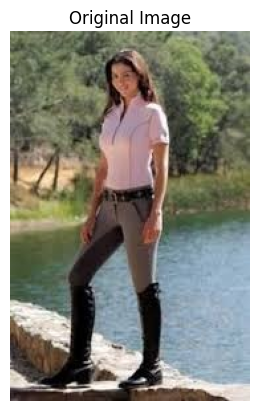

Predicted category: dog


In [ ]:
import matplotlib.pyplot as plt
# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))  # by default, OpenCV loads images in the BGR color space.to convert  from BGR (Blue-Green-Red) to RGB (Red-Green-Blue).
plt.title("Original Image")
plt.axis("off")  # Turn off axis labels
plt.show()
print("Predicted category:", predicted_category)